## Preprocessament d'imatges

### https://www.kaggle.com/code/pranavmoothedath/ds-updated

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import resize
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image



In [2]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): 
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img
    

In [3]:
def gauss_circle(img):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = crop_image_from_gray(img)
    img = cv2.resize(img,(224,224))
     #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    #img = crop_image_from_gray(img)
    img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX= 30) ,-4 ,128)
    
    return img


In [4]:
def save_image(img_preprocessed, save_path):
    # Assure img_preprocessed is in the range [0, 255] and type uint8
    img_preprocessed_clipped = np.clip(img_preprocessed, 0, 255)
    img_preprocessed_uint8 = img_preprocessed_clipped.astype(np.uint8)

    # Save image
    cv2.imwrite(save_path, cv2.cvtColor(img_preprocessed_uint8, cv2.COLOR_RGB2BGR))


In [5]:
def preprocess_and_save(image_path, save_path):
    # Load original image with TensorFlow/Keras
    img = load_img(image_path)  #load as a PIL object
    
    # Convert PIL image to numpy array
    img_array = img_to_array(img)
    
    # Apply gauss_cercle funtion to preprocess image
    img_processed = gauss_circle(img_array)
    save_image(img_processed, save_path)

    
 

(-0.5, 223.5, 223.5, -0.5)

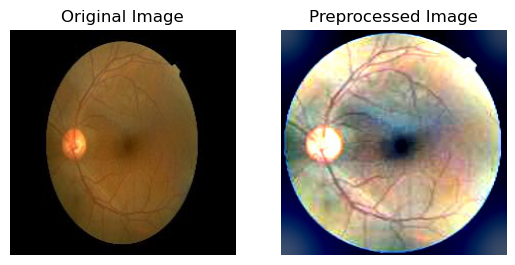

In [7]:
preprocess_and_save('original_2.jpg','preprocessed_2.jpg' )
fig, (ax1, ax2) = plt.subplots(1, 2)
original_img = load_img('original_2.jpg')
preprocessed_img= load_img('preprocessed_2.jpg')

ax1.imshow(original_img)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(preprocessed_img)
ax2.set_title('Preprocessed Image')
ax2.axis('off')

## Aplicar la funció preprocess_and_save_images per a generar un nou conjut de dades

In [16]:
import os
from pathlib import Path
from tqdm import tqdm

def preprocess_and_save_images_in_folder(source_folder, destination_folder):
    """
    Process and save images in all subfolders inside source_folder,
    keeping subfolder structure in destination_folder.
    """
    # Create destination folder if does not exist
    Path(destination_folder).mkdir(parents=True, exist_ok=True)
    
    # Look for subfolders in source folder
    subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]
    
    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        destination_subfolder = os.path.join(destination_folder, subfolder_name)
        
        # Create destination subfolder if does not exist
        Path(destination_subfolder).mkdir(parents=True, exist_ok=True)
        
        # Process and save images in current subfolder
        file_names = os.listdir(subfolder)
        for file_name in tqdm(file_names, desc=f"Processing {subfolder_name}"):
            source_path = os.path.join(subfolder, file_name)
            destination_path = os.path.join(destination_subfolder, file_name)
            
            # Apply preprocess function and save image
            preprocess_and_save(source_path, destination_path)

# Execute for traiing, valid and text folders
source_folder = 'Dataset/test_original'
destination_folder = 'Dataset/test_preprocessed'
preprocess_and_save_images_in_folder(source_folder, destination_folder)



Processing No_DR: 100%|██████████████████████████████████████████████████████████████| 118/118 [00:02<00:00, 56.61it/s]
